<a href="https://colab.research.google.com/github/aparnashenoy/ml/blob/master/kaggle_heartparameters_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, roc_auc_score, roc_curve
%matplotlib inline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import binarize
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df= pd.read_csv("/gdrive/My Drive/df1_heart.csv")

In [4]:
df.head()

,Unnamed: 0,HR,O2Sat,Temp,SBP,MAP,DBP,Age,SepsisLabel
0,0,99.0,100.0,37.0,120.0,71.0,60.0,69.66,0
1,1,97.5,100.0,37.0,120.0,78.0,60.0,69.66,0
2,2,96.0,100.0,37.0,120.0,70.0,60.0,69.66,0
3,3,100.0,99.0,37.0,120.0,75.0,60.0,69.66,0
4,4,102.0,100.0,36.0,120.0,74.0,60.0,69.66,0


In [5]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
df.SepsisLabel.value_counts()

0    973683
1     20124
Name: SepsisLabel, dtype: int64

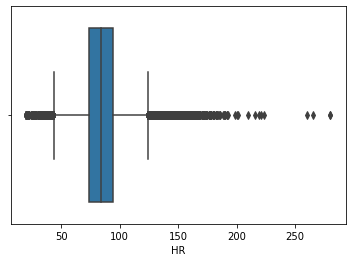

In [7]:
sns.boxplot(df['HR'])

In [8]:
print(df['HR'].quantile(0.10))
print(df['HR'].quantile(0.90))

64.0
106.0


In [9]:
df["HR"] = np.where(df["HR"] <64.0, 64.0,df['HR'])
df["HR"] = np.where(df["HR"] >106.0, 106.0,df['HR'])
print(df['HR'].skew())

0.11335757383538864


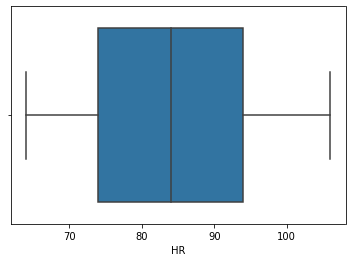

In [10]:
sns.boxplot(df['HR'])

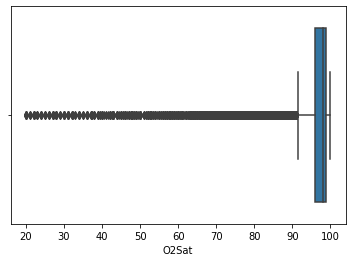

In [11]:
sns.boxplot(df['O2Sat'])

In [12]:
print(df['O2Sat'].quantile(0.10))
print(df['O2Sat'].quantile(0.90))

94.0
100.0


In [13]:
df["O2Sat"] = np.where(df["O2Sat"] <94.0, 94.0,df['O2Sat'])
df["O2Sat"] = np.where(df["O2Sat"] >100.0, 100.0,df['O2Sat'])
print(df['O2Sat'].skew())

-0.4277130710644394


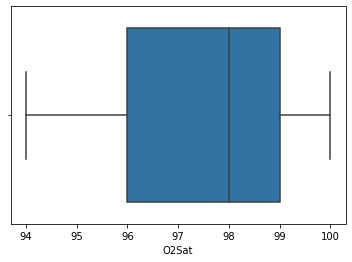

In [14]:
sns.boxplot(df['O2Sat'])

In [15]:
print(df['SBP'].quantile(0.10))
print(df['SBP'].quantile(0.90))

97.0
150.0


In [16]:
df["SBP"] = np.where(df["SBP"] <97.0, 97.0,df['SBP'])
df["SBP"] = np.where(df["SBP"] >150.0, 150.0,df['SBP'])
print(df['SBP'].skew())

0.2804638587639356


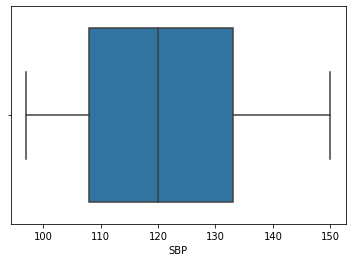

In [17]:
sns.boxplot(df['SBP'])

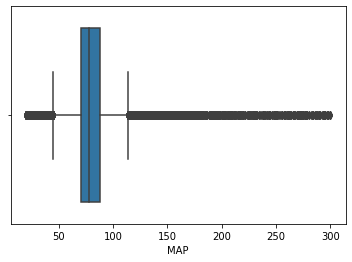

In [18]:
sns.boxplot(df['MAP'])

In [19]:
print(df['MAP'].quantile(0.10))
print(df['MAP'].quantile(0.90))

63.0
99.0


In [20]:
df["MAP"] = np.where(df["MAP"] <63.0, 63.0,df['MAP'])
df["MAP"] = np.where(df["MAP"] >99.0, 99.0,df['MAP'])
print(df['MAP'].skew())

0.2901440610172552


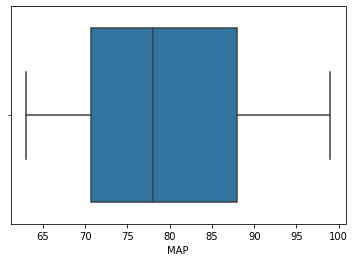

In [21]:
sns.boxplot(df['MAP'])

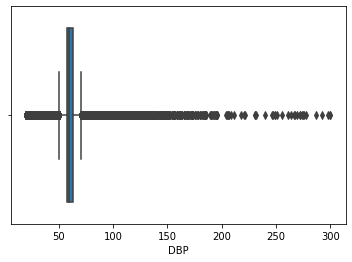

In [22]:
sns.boxplot(df['DBP'])

In [23]:
print(df['DBP'].quantile(0.10))
print(df['DBP'].quantile(0.90))

50.0
74.0


In [24]:
df["DBP"] = np.where(df["DBP"] <50.0, 50.0,df['DBP'])
df["DBP"] = np.where(df["DBP"] >74.0, 74.0,df['DBP'])
print(df['DBP'].skew())

0.44949881448858164


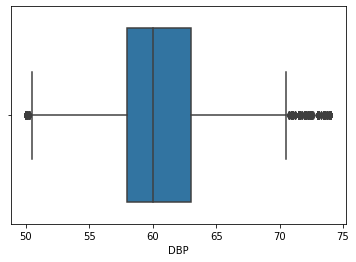

In [25]:
sns.boxplot(df['DBP'])

In [26]:
print(df.SepsisLabel.value_counts())

0    973683
1     20124
Name: SepsisLabel, dtype: int64


In [27]:
df.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Age', 'SepsisLabel'], dtype='object')

In [28]:
from pandas import read_csv, DataFrame, crosstab, pivot_table, set_option

In [29]:
set_option('display.width', 100)
set_option('precision', 3)

In [30]:
print("Data row and column dimensions:")
print("")
print(df.shape)
print("")

Data row and column dimensions:

(993807, 8)



In [31]:
# Class Distribution
tot = 993807
class_counts = df.groupby('SepsisLabel').size()/tot*100
class_pct = class_counts.map('{:,.2f}%'.format)
print("Distribution of pre-diabetes: ", class_counts)
print("")

Distribution of pre-diabetes:  SepsisLabel
0    97.975
1     2.025
dtype: float64



In [32]:
# Descriptives
df = df.sample(n=20000, replace=False,random_state=1)
df = DataFrame(df)
print("Descriptive distributions:")
print("")
print(df.describe())
print("")


Descriptive distributions:

              HR      O2Sat       Temp  ...        DBP        Age  SepsisLabel
count  20000.000  20000.000  20000.000  ...  20000.000  20000.000    20000.000
mean      84.309     97.528     37.014  ...     60.702     62.463        0.021
std       13.194      1.959      0.437  ...      6.749     16.393        0.144
min       64.000     94.000     32.700  ...     50.000     14.000        0.000
25%       74.000     96.000     37.000  ...     58.000     52.000        0.000
50%       84.000     98.000     37.000  ...     60.000     64.450        0.000
75%       94.000     99.000     37.000  ...     63.000     75.250        0.000
max      106.000    100.000     40.000  ...     74.000    100.000        1.000

[8 rows x 8 columns]



In [33]:
# Examine skew of the attribute distributions
skew = df.skew()
print("Skew of attributes:")
print("")
print(skew)
print("")

Skew of attributes:

HR             0.119
O2Sat         -0.420
Temp           0.012
SBP            0.276
MAP            0.289
DBP            0.448
Age           -0.530
SepsisLabel    6.665
dtype: float64



In [34]:
# Crosstabs
print("Mean values of inputs by pre-diabetes class:")
pivot_table(df,values=['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Age'],index='SepsisLabel',aggfunc=np.mean)

Mean values of inputs by pre-diabetes class:


,Age,DBP,HR,MAP,O2Sat,SBP,Temp
SepsisLabel,,,,,,,
0,62.487,60.701,84.230,79.481,97.530,121.184,37.008
1,61.336,60.746,87.949,78.625,97.409,119.767,37.322


Histograms of model inputs


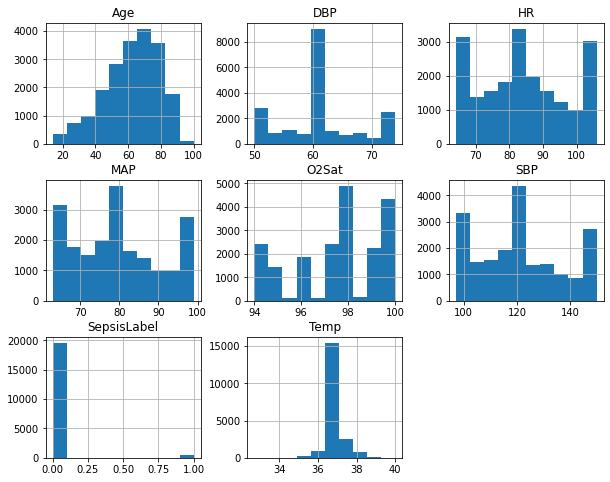


Density plots of model inputs


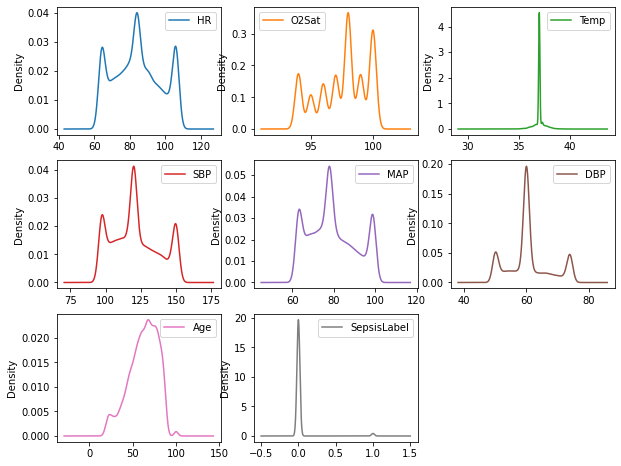

In [35]:
# Univariate Histograms
from matplotlib import pyplot
print("Histograms of model inputs")
df.hist(figsize=(10,8))
pyplot.show()
print("")
# Density plots
print("Density plots of model inputs")
df.plot(kind='density', subplots=True, layout=(3,3), sharex=False, figsize=(10,8))
pyplot.show()

Bivariate scatter plots of model inputs


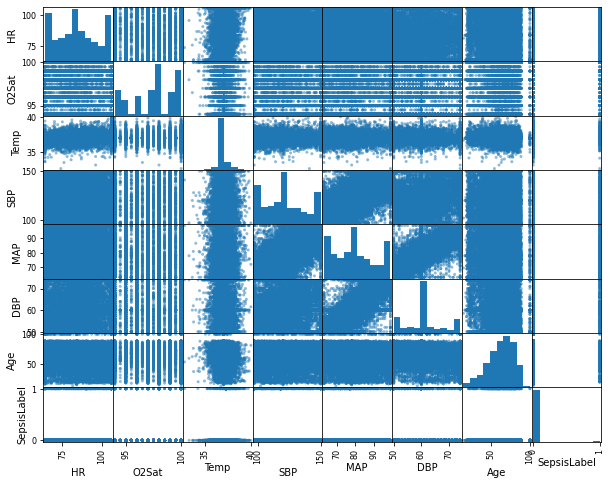


Heatmap of partial correlations between model inputs


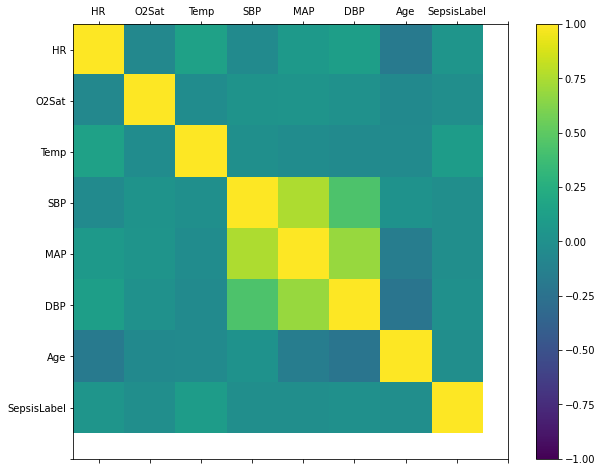

In [36]:
# Matrix Plots
from matplotlib import pyplot

# Scatterplot Matrix
print("Bivariate scatter plots of model inputs")
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(10,8))
pyplot.show()
print("")

# Correlation matrix
print("Heatmap of partial correlations between model inputs")
correlations = df.corr()
fig = pyplot.figure(figsize=(10,8))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
names = ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Age', 'SepsisLabel']
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()

In [37]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [39]:
X=df.drop(['SepsisLabel'],1)
y=df['SepsisLabel']

In [40]:
# evaluate an LDA model on the mean imputation dataset using k-fold cross validation
model = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=5, random_state=7)
result = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
accuracy = result.mean()
print("Accuracy of Linear Discriminant Analysis: %.2f%%" % (accuracy * 100.0))

Accuracy of Linear Discriminant Analysis: 97.84%


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [41]:
from sklearn import ensemble
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [43]:
#PARAMETER EVALUATION WITH GSC VALIDATION
gbe = GradientBoostingClassifier(random_state=0)
parameters={
    'learning_rate': [0.05, 0.1, 0.5],
    'max_features': [0.5, 1],
    'max_depth': [3, 4, 5]
}
gridsearch=GridSearchCV(gbe,parameters,cv=100,scoring='roc_auc')
gridsearch.fit(X,y)
print(gridsearch.best_params_)
print(gridsearch.best_score_)

{'learning_rate': 0.05, 'max_depth': 4, 'max_features': 0.5}
0.9624489795918366


In [44]:
#ADJUSTING DEVELOPMENT THRESHOLD
gbi = GradientBoostingClassifier(learning_rate=0.05,max_depth=4,max_features=0.5,random_state=0)
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=0)
gbi.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=4,
                           max_features=0.5, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [45]:
#STORING THE PREDICTION
yprediction = gbi.predict_proba(x_test)[:,1]

Text(0, 0.5, 'Frequency')

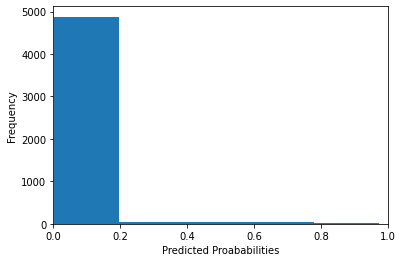

In [46]:
#PLOTTING THE PREDICTIONS
plt.hist(yprediction,bins=5)
plt.xlim(0,1)
plt.xlabel("Predicted Proababilities")
plt.ylabel("Frequency")

In [47]:
#CLASSIFIER SCORE
round(roc_auc_score(y_test,yprediction),5)

0.94996

In [48]:
#USING RANDOM FOREST CLASSIFICATION
from sklearn.ensemble import RandomForestClassifier
rmfr = RandomForestClassifier()
rmfr.fit(x_train, y_train)
y_pred = rmfr.predict(x_test)
accuracyrf = round(accuracy_score(y_pred, y_test), 5)
accuracyrf

0.9854

In [49]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]
accuracy = round(accuracy_score(y_test, predictions),5)
accuracy

0.9852

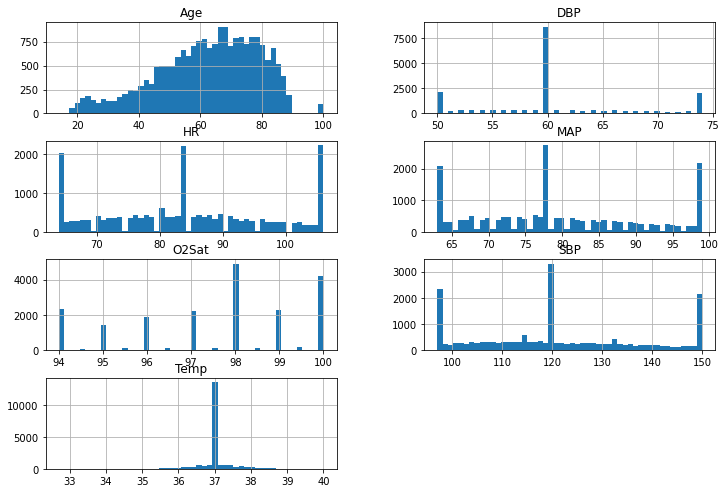

In [50]:
columns = list(df)[0:-1] # Excluding Outcome column which has only 
df[columns].hist(stacked=False, bins=50, figsize=(12,30), layout=(14,2)); 
# Histogram of first 8 columns

In [51]:
df.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Age', 'SepsisLabel'], dtype='object')

In [52]:
n_true = len(df.loc[df['SepsisLabel'] == True])
n_false = len(df.loc[df['SepsisLabel'] == False])
print("Number of true cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of false cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of true cases: 422 (2.11%)
Number of false cases: 19578 (97.89%)


In [53]:
from sklearn.model_selection import train_test_split

features_cols = ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Age']
predicted_class = ['SepsisLabel']

X = df[features_cols].values      # Predictor feature columns (8 X m)
Y = df[predicted_class]. values   # Predicted class (1=True, 0=False) (1 X m)
split_test_size = 0.30

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=split_test_size, random_state=52)
# I took 52 as just any random seed number

In [54]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(df.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [55]:
print("Original Sepsis True Values    : {0} ({1:0.2f}%)".format(len(df.loc[df['SepsisLabel'] == 1]), (len(df.loc[df['SepsisLabel'] == 1])/len(df.index)) * 100))
print("Original Sepsis False Values   : {0} ({1:0.2f}%)".format(len(df.loc[df['SepsisLabel'] == 0]), (len(df.loc[df['SepsisLabel'] == 0])/len(df.index)) * 100))
print("")
print("Training Sepsis True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Sepsis False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Sepsis True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Sepsis False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Sepsis True Values    : 422 (2.11%)
Original Sepsis False Values   : 19578 (97.89%)

Training Sepsis True Values    : 286 (2.04%)
Training Sepsis False Values   : 13714 (97.96%)

Test Sepsis True Values        : 136 (2.27%)
Test Sepsis False Values       : 5864 (97.73%)



In [56]:
from sklearn.naive_bayes import GaussianNB # I am using Gaussian algorithm from Naive Bayes

# Lets creat the model
sepsis_model = GaussianNB()

sepsis_model.fit(x_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [57]:
sepsis_train_predict = sepsis_model.predict(x_train)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, sepsis_train_predict)))
print()

Model Accuracy: 0.9702



In [58]:
sepsis_test_predict = sepsis_model.predict(x_test)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, sepsis_test_predict)))
print()

Model Accuracy: 0.9630



In [59]:
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(y_test, sepsis_test_predict, labels=[1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, sepsis_test_predict, labels=[1, 0]))

Confusion Matrix
[[   5  131]
 [  91 5773]]

Classification Report
              precision    recall  f1-score   support

           1       0.05      0.04      0.04       136
           0       0.98      0.98      0.98      5864

    accuracy                           0.96      6000
   macro avg       0.51      0.51      0.51      6000
weighted avg       0.96      0.96      0.96      6000



In [60]:
from sklearn.ensemble import RandomForestClassifier
sepsis_rf_model = RandomForestClassifier(random_state=52)
sepsis_rf_model.fit(x_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=52, verbose=0,
                       warm_start=False)

In [62]:
rf_train_predict = sepsis_rf_model.predict(x_train)
print("Model Accuracy: {0:.2f}".format(metrics.accuracy_score(y_train, rf_train_predict)))

Model Accuracy: 1.00


In [63]:
rf_test_predict = sepsis_rf_model.predict(x_test)
print("Model Accuracy: {0:.2f}".format(metrics.accuracy_score(y_test, rf_test_predict)))

Model Accuracy: 0.98


In [64]:
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test, rf_test_predict, labels=[1, 0]))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, rf_test_predict, labels=[1, 0]))

Confusion Matrix
[[  58   78]
 [  13 5851]]

Classification Report
              precision    recall  f1-score   support

           1       0.82      0.43      0.56       136
           0       0.99      1.00      0.99      5864

    accuracy                           0.98      6000
   macro avg       0.90      0.71      0.78      6000
weighted avg       0.98      0.98      0.98      6000



In [65]:
from sklearn.linear_model import LogisticRegression

sepsis_lr_model = LogisticRegression(C=0.7, random_state=52)
sepsis_lr_model.fit(x_train, y_train.ravel())
lr_test_predict = sepsis_lr_model.predict(x_test)

print("Model Accuracy: {0:.2f}".format(metrics.accuracy_score(y_test, lr_test_predict)))
print("")
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test, lr_test_predict, labels=[1, 0]))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_test_predict, labels=[1, 0]))

Model Accuracy: 0.98

Confusion Matrix
[[   0  136]
 [   0 5864]]

Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       136
           0       0.98      1.00      0.99      5864

    accuracy                           0.98      6000
   macro avg       0.49      0.50      0.49      6000
weighted avg       0.96      0.98      0.97      6000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
from sklearn.linear_model import LogisticRegressionCV
sepsis_lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=52, Cs=3, cv=10, refit=True, class_weight="balanced")
# As this algorithm uses k-fold cross validation so I am using 10 folds. Also I am using class_weight as balanced so it will use balanced data for Outcome
sepsis_lr_cv_model.fit(x_train, y_train.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=-1, penalty='l2',
                     random_state=52, refit=True, scoring=None, solver='lbfgs',
                     tol=0.0001, verbose=0)

In [67]:
lr_cv_test_predict = sepsis_lr_cv_model.predict(x_test)

print("Model Accuracy: {0:.2f}".format(metrics.accuracy_score(y_test, lr_cv_test_predict)))
print("")
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test, lr_cv_test_predict, labels=[1, 0]))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_cv_test_predict, labels=[1, 0]))

Model Accuracy: 0.77

Confusion Matrix
[[ 102   34]
 [1318 4546]]

Classification Report
              precision    recall  f1-score   support

           1       0.07      0.75      0.13       136
           0       0.99      0.78      0.87      5864

    accuracy                           0.77      6000
   macro avg       0.53      0.76      0.50      6000
weighted avg       0.97      0.77      0.85      6000



In [68]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [69]:
X=df.drop(['SepsisLabel'],1)
y=df['SepsisLabel']

In [70]:
select_top_4 = SelectKBest(score_func=chi2, k = 4)

In [71]:
fit = select_top_4.fit(X,y)
features = fit.transform(X)

In [72]:
features[0:5]

array([[ 74.  , 101.  ,  63.  ,  71.51],
       [ 69.  , 127.  ,  89.  ,  48.61],
       [105.  , 150.  ,  99.  ,  59.67],
       [ 91.  , 128.  ,  94.  ,  50.  ],
       [ 94.  , 138.  ,  95.33,  70.  ]])

In [73]:
df.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Age,SepsisLabel
627565,74.0,98.0,37.0,101.0,63.00,60.0,71.51,0
596596,69.0,99.0,37.0,127.0,89.00,72.0,48.61,0
397609,105.0,95.0,37.0,150.0,99.00,74.0,59.67,0
904755,91.0,99.0,37.4,128.0,94.00,74.0,50.00,0
462935,94.0,98.0,37.0,138.0,95.33,60.0,70.00,0


In [74]:
X_features = pd.DataFrame(data = features, columns = ["HR","SBP","MAP","Age"])

In [75]:
X_features.head()

,HR,SBP,MAP,Age
0,74.0,101.0,63.00,71.51
1,69.0,127.0,89.00,48.61
2,105.0,150.0,99.00,59.67
3,91.0,128.0,94.00,50.00
4,94.0,138.0,95.33,70.00


In [76]:
y.head()

627565    0
596596    0
397609    0
904755    0
462935    0
Name: SepsisLabel, dtype: int64

Standardization

In [77]:
from sklearn.preprocessing import StandardScaler
rescaledX = StandardScaler().fit_transform(X_features)

In [78]:
X = pd.DataFrame(data = rescaledX, columns= X_features.columns)

In [79]:
X.head()

,HR,SBP,MAP,Age
0,-0.781,-1.228,-1.465,0.552
1,-1.160,0.356,0.848,-0.845
2,1.568,1.757,1.738,-0.170
3,0.507,0.417,1.293,-0.760
4,0.735,1.026,1.412,0.460


In [80]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y, random_state = 22, test_size = 0.2)

In [81]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [82]:
models = []
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("SVM",SVC()))

In [83]:
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=22)
    cv_result = cross_val_score(model,X_train,Y_train, cv = kfold,scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean())

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will ra

LR 0.9792500000000001
NB 0.9792500000000001
KNN 0.9792499999999998
DT 0.959375
SVM 0.9792500000000001


[Text(0, 0, 'LR'),
 Text(0, 0, 'NB'),
 Text(0, 0, 'KNN'),
 Text(0, 0, 'DT'),
 Text(0, 0, 'SVM')]

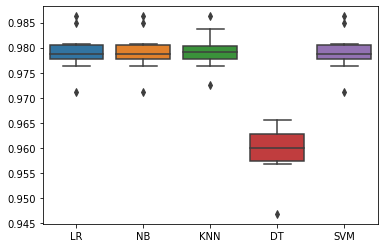

In [84]:
ax = sns.boxplot(data=results)
ax.set_xticklabels(names)

In [90]:
lr = LogisticRegression()
lr.fit(X_train,Y_train)
predictions_lr = lr.predict(X_test)

In [91]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [92]:
print(accuracy_score(Y_test,predictions_lr))

0.9775


In [93]:
svm = SVC()
svm.fit(X_train,Y_train)
predictions_svc = svm.predict(X_test)

In [94]:
print(accuracy_score(Y_test,predictions_svc))

0.9775


In [95]:
print(classification_report(Y_test,predictions_svc))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3910
           1       0.00      0.00      0.00        90

    accuracy                           0.98      4000
   macro avg       0.49      0.50      0.49      4000
weighted avg       0.96      0.98      0.97      4000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [97]:
conf_svc = confusion_matrix(Y_test,predictions_svc)

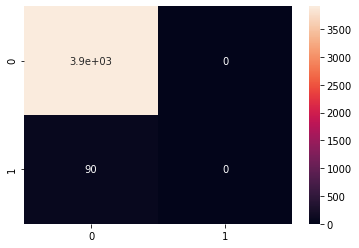

In [98]:
label = ["0","1"]
sns.heatmap(conf_svc, annot=True, xticklabels=label, yticklabels=label)

In [99]:
print(classification_report(Y_test,predictions_lr))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3910
           1       0.00      0.00      0.00        90

    accuracy                           0.98      4000
   macro avg       0.49      0.50      0.49      4000
weighted avg       0.96      0.98      0.97      4000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [100]:
conf_lr = confusion_matrix(Y_test,predictions_lr)

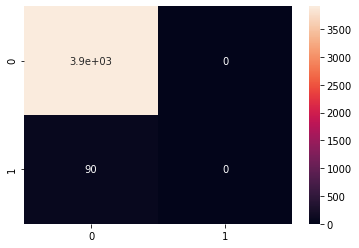

In [101]:
label = ["0","1"]
sns.heatmap(conf_lr, annot=True, xticklabels=label, yticklabels=label)